# Principle Component Aanalysis 

Source: 1. https://github.com/patrickloeber/MLfromscratch/blob/master/mlfromscratch/pca.py
2. https://www.kaggle.com/code/bhatnagardaksh/pca-and-lda-implementation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [3]:
# Load csv file 
df = pd.read_csv('./preprocessed_data/norm_data_standardized.csv', index_col=False)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.779975,-0.179534,-0.283909,-0.343666,2.0
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.420693,-0.179534,-0.611387,-0.343666,2.0
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.129474,-0.179534,1.353485,-0.343666,2.0
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0


In [4]:
import numpy as np


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)
    
    def explained_variance(self, X):
        variance_explained=[]
        c=0
        
        # covariance 
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        for i in range(len((eigenvalues/(np.sum(eigenvalues))*100))): 
            c = c + np.around((eigenvalues[i]/(np.sum(eigenvalues))*100),3)
            while c < 92:
                variance_explained.append(c)
                print('At', i,'PC,', 'Explained Variance is',c)
                break
        return variance_explained


In [5]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [6]:
# Project data over 2 principal component
pca = PCA(3)
pca.fit(X)
X_projected = pca.transform(X)


In [13]:
y

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
694    2.0
695    2.0
696    4.0
697    4.0
698    4.0
Name: Class, Length: 699, dtype: float64

In [8]:
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (699, 9)
Shape of transformed X: (699, 3)


In [9]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
x3 = X_projected[:, 2]


In [21]:
cancer = ['benign', 'malignant']

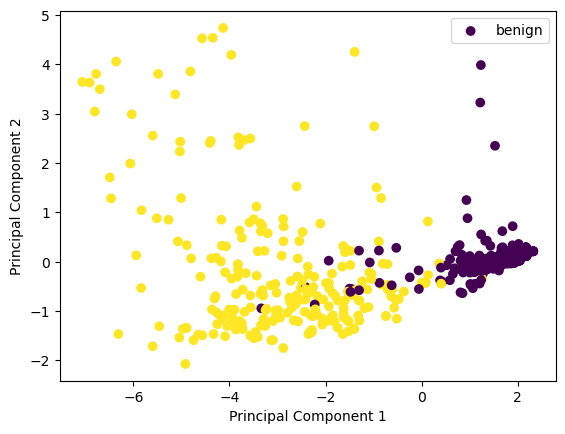

In [37]:
plt.scatter(x1, x2, c=y)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#plt.colorbar()
plt.legend(labels=cancer)
plt.show()

/tmp/ipykernel_6394/1804473883.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)


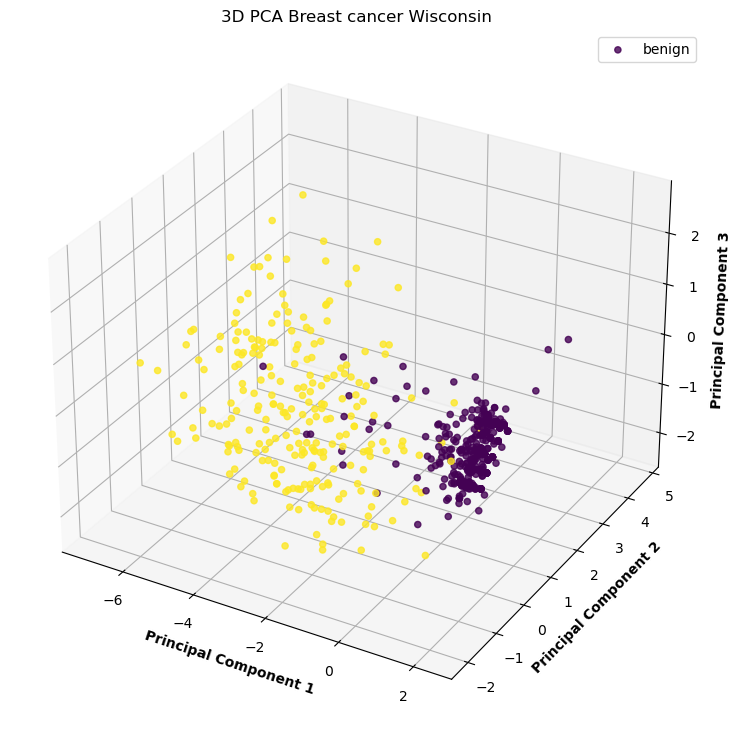

In [40]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(x1, x2, x3,alpha = 0.8,c =y)
plt.title("3D PCA Breast cancer Wisconsin")
ax.set_xlabel('Principal Component 1', fontweight ='bold')
ax.set_ylabel('Principal Component 2', fontweight ='bold')
ax.set_zlabel('Principal Component 3', fontweight ='bold')
#fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.legend(labels=cancer)
plt.show()

Text(0, 0.5, 'Principal Component 2')

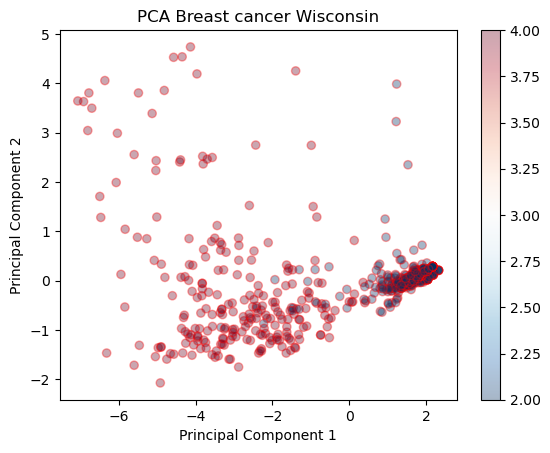

In [12]:
plt.scatter(x1,x2, c = y, cmap = "RdBu_r", edgecolor = "Red", alpha=0.35)
plt.colorbar()
plt.title('PCA Breast cancer Wisconsin')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [10]:
explained_variance = pca.explained_variance(X)

At 0 PC, Explained Variance is 65.356
At 1 PC, Explained Variance is 73.982
At 2 PC, Explained Variance is 74.97
At 3 PC, Explained Variance is 80.958
At 4 PC, Explained Variance is 86.154
At 5 PC, Explained Variance is 90.38


In [12]:
explained_variance

[65.356, 73.982, 74.97, 80.958, 86.154, 90.38]

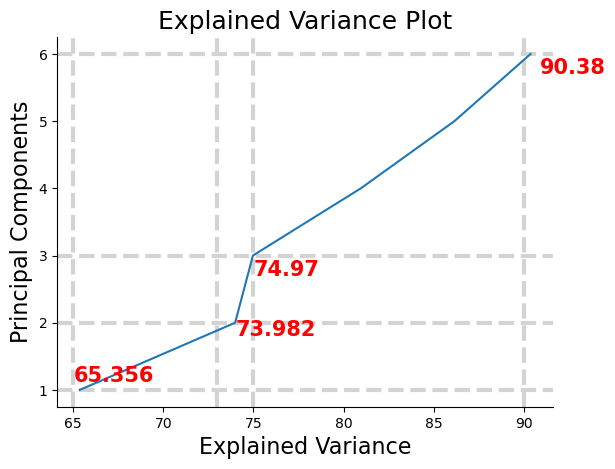

In [22]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(1, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(2, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(3, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(6, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(65, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(73, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(75, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(90, linestyle='--', lw=3, zorder=1, color='lightgray')

plt.annotate(f'65.356', (65, 1.12), fontsize=15, fontweight='bold', color='red')
plt.annotate(f'73.982', (74, 1.8), fontsize=15, fontweight='bold', color='red')
plt.annotate(f'74.97', (75, 2.7), fontsize=15,  fontweight='bold', color='red')
plt.annotate(f'90.38', (90.9, 5.7), fontsize=15, fontweight='bold', color='red')

plt.title('Explained Variance Plot', fontsize=18)
plt.xlabel('Explained Variance', fontsize=16)
plt.ylabel('Principal Components',fontsize=16)
plt.show()
